In [15]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline

In [16]:
def read_input_file(filepath):
    """Reads in the input files located by the filepath <str> argument and returns a parsed dataframe."""
    
    frame = pd.read_csv(filepath)
    frame['Date'] = pd.to_datetime(frame['Date'], format='%d/%m/%Y')
    frame = frame.sort_values('Date', ascending=True).reset_index(drop=True)
    return frame

In [17]:
reservoir_levels = read_input_file('chennai_reservoir_levels.csv')
rainfall = read_input_file('chennai_reservoir_rainfall.csv')

In [18]:
reservoir_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [5]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


In [6]:
print(reservoir_levels.isnull().sum(), '\n\n', rainfall.isnull().sum())

Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64 

 Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64


In [7]:
start_date, end_date = reservoir_levels['Date'].min(), reservoir_levels['Date'].max()
print('Dataset Start Date:', start_date.strftime('%d-%b-%y'))
print('Dataset End Date:', end_date.strftime('%d-%b-%y'))

Dataset Start Date: 01-Jan-04
Dataset End Date: 17-Jun-19


In [8]:
reservoir_levels.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,1133.272203,240.020572,1568.345573,1321.381645
std,1026.009311,274.601731,890.363617,957.057834
min,0.900000,0.000000,0.000000,0.000000
25%,213.000000,22.300000,849.000000,471.500000
50%,782.000000,92.000000,1630.000000,1225.000000
75%,2006.000000,460.000000,2236.000000,2083.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [9]:
rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862
std,12.755029,14.078840,15.060551,16.287227
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


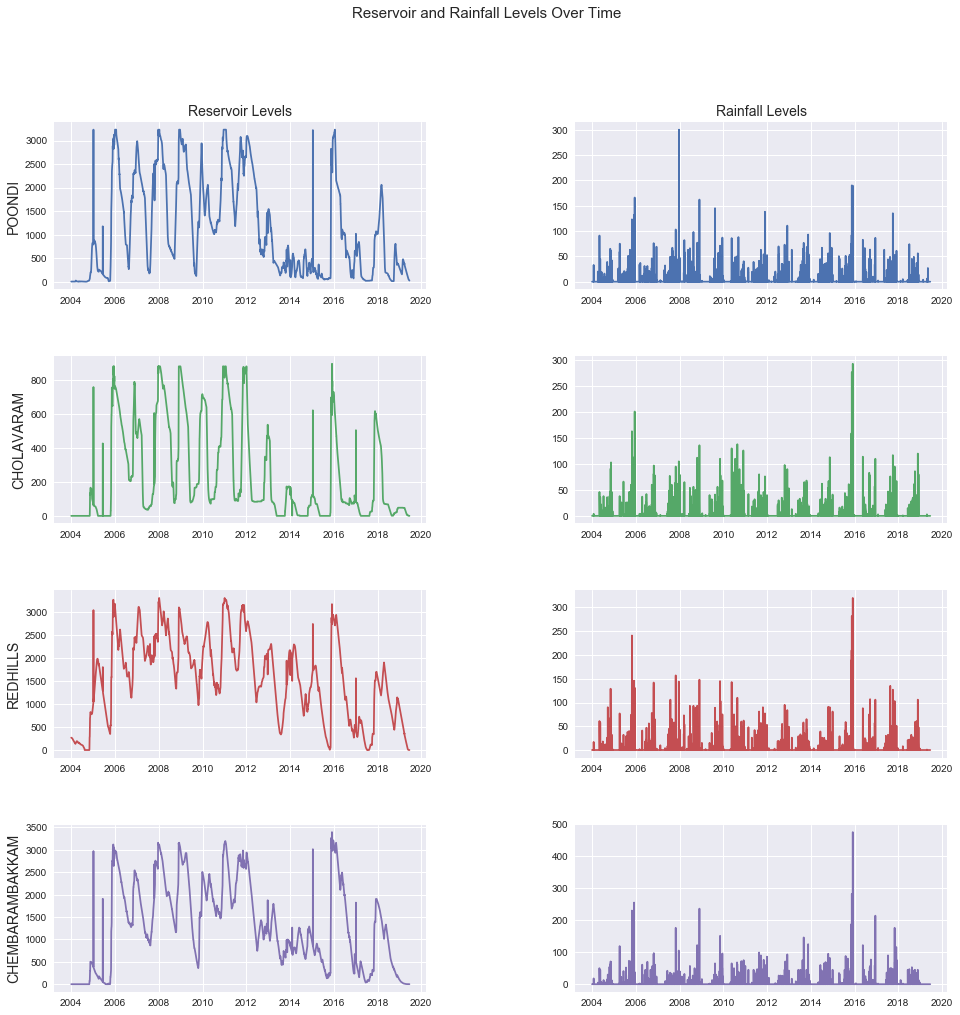

In [10]:
def plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall, type='line', alpha=1):
    """
    Creates 8 plots, 4 rows and 2 columns, with one row per region in Chennai where the first
    "cell" holds the reservoir levels over time and the second holds rainfall levels over time.
    The 'type' variable determines the output is a line plot (type = 'line') or if the output is
    a barplot (type != 'line').
    """
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for index, column in enumerate(reservoir_levels.columns[1:]):
        c = colors[index]
        if type == 'line':
            ax[index][0].plot(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].plot(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        else:
            ax[index][0].bar(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].bar(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        ax[index][0].set_ylabel(column, size=14)
    ax[0][0].set_title('Reservoir Levels', size=14)
    ax[0][1].set_title('Rainfall Levels', size=14)
    fig.suptitle('Reservoir and Rainfall Levels Over Time', size=15)

plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall)

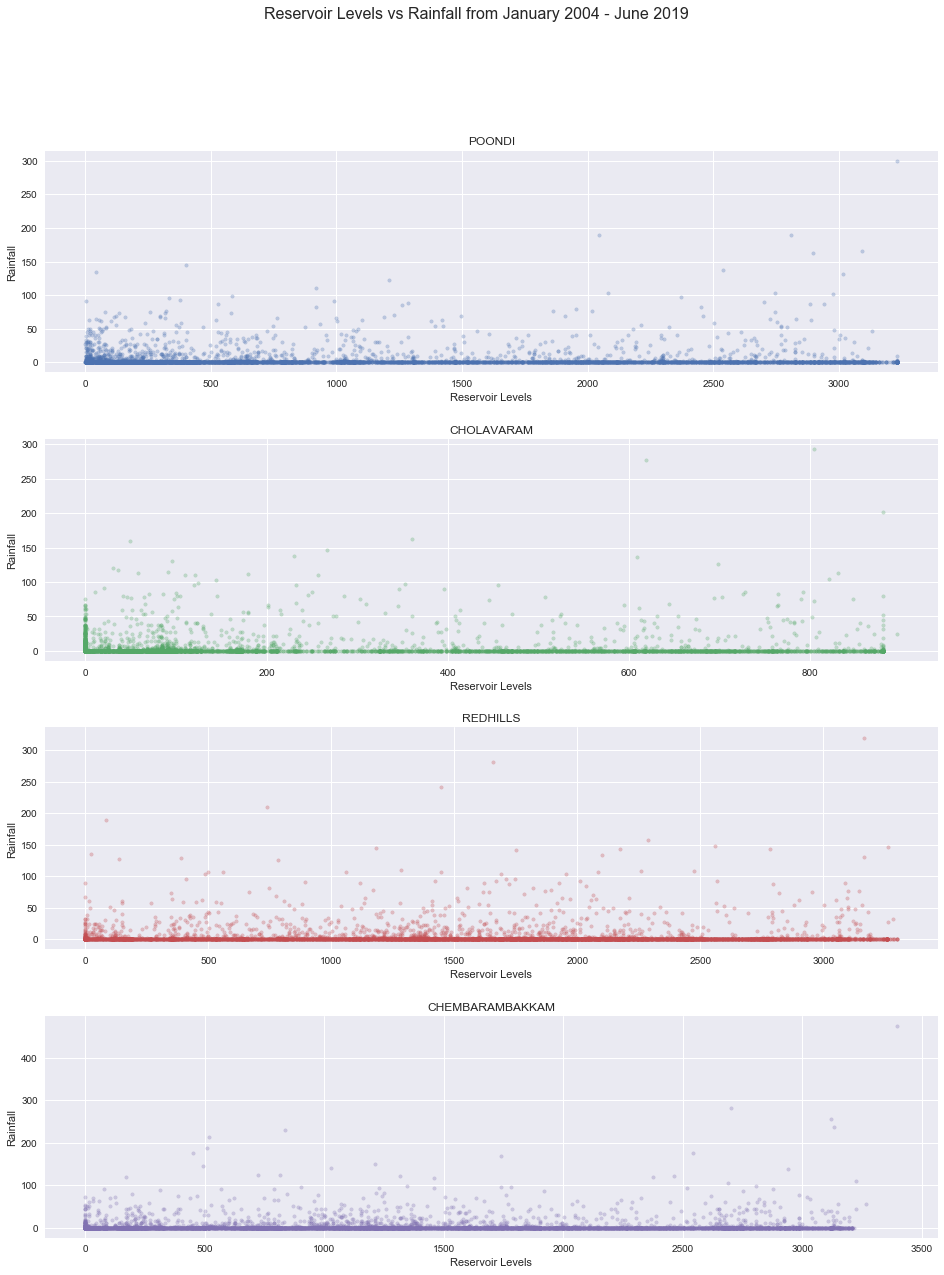

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(16, 20))
for index, column in enumerate(reservoir_levels.columns[1:]):
    ax[index].scatter(reservoir_levels[column], rainfall[column], marker='.', color=colors[index], alpha=0.3)
    ax[index].set_ylabel('Rainfall')
    ax[index].set_title(column)
    ax[index].set_xlabel('Reservoir Levels')
fig.suptitle('Reservoir Levels vs Rainfall from January 2004 - June 2019', size=16)
fig.subplots_adjust(hspace=0.3)


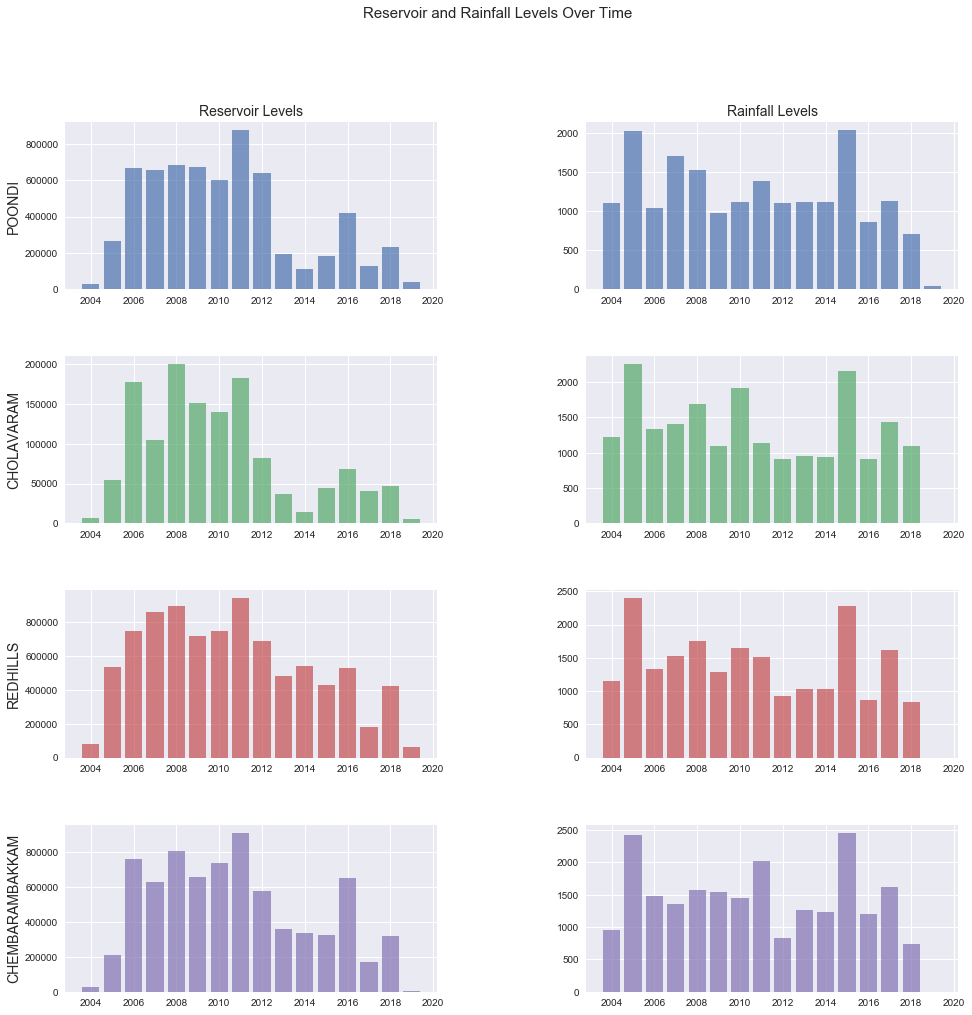

In [12]:
res_year = reservoir_levels.groupby(reservoir_levels.Date.dt.year).sum().reset_index()
rain_year = rainfall.groupby(rainfall.Date.dt.year).sum().reset_index()
plot_rainfall_and_reservoir_levels(res_year, rain_year, 'bar', 0.7)

In [13]:
def get_rolling_rainfall_levels(reservoir_levels, rainfall, days):
    """
    Returns a dataframe with the reservoir level per day and the total
    accumulated rainfall over the past [days] days.
    """
    
    rolling_rainfall = rainfall.iloc[:, 1:].sum(axis=1).rolling(days).sum()
    reservoir_sum_per_day = reservoir_levels.iloc[:, 1:].sum(axis=1)
    merged_frame = pd.concat([reservoir_sum_per_day, rolling_rainfall], axis=1)
    return merged_frame.dropna().reset_index(drop=True)

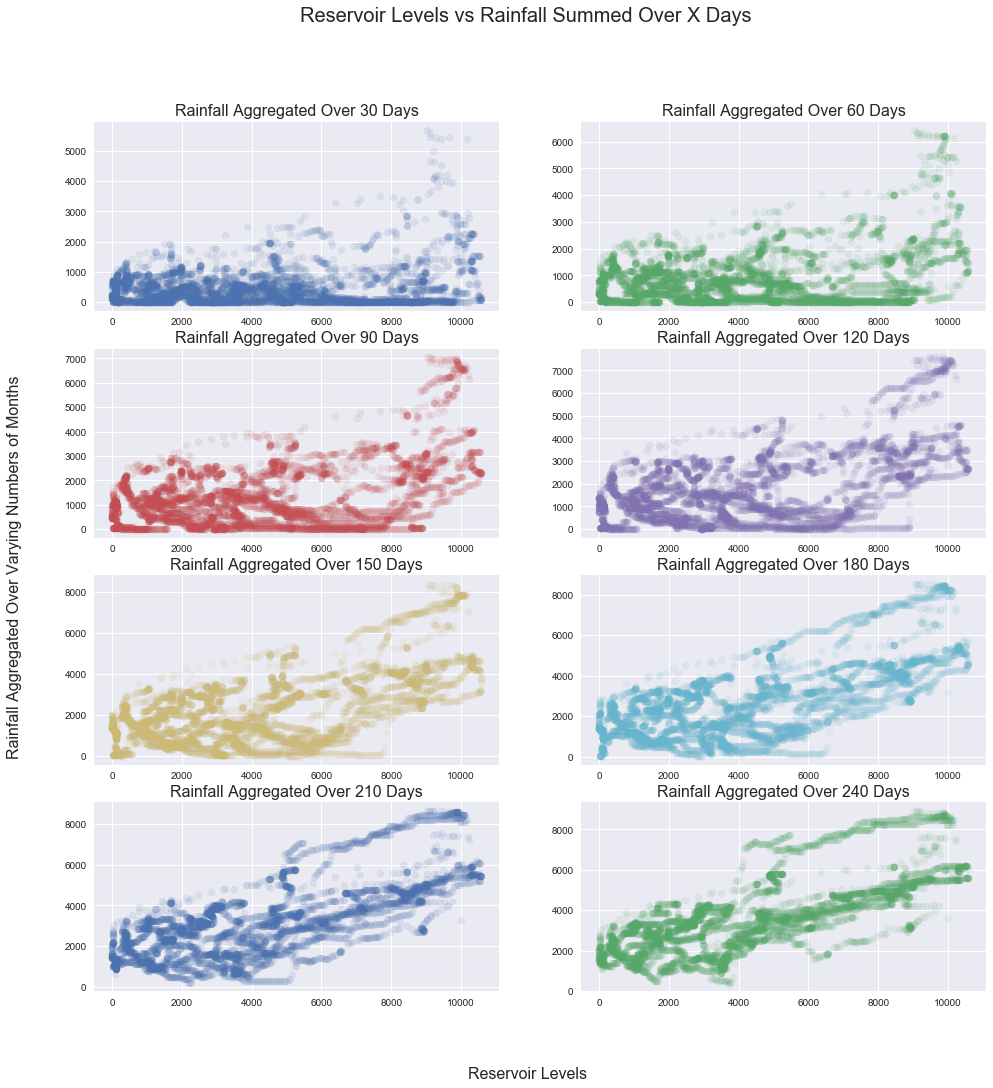

In [14]:
n_days = 30
n_months = 8
months = [i for i in range(30, (n_months + 1) * 30, 30)]
data = [get_rolling_rainfall_levels(reservoir_levels, rainfall, month) for month in months]

# Plot each scatter plot
nrows = math.ceil(len(months) / 2)
fig, ax = plt.subplots(nrows, 2, figsize=(16, 16))
for index, frame in enumerate(data):
    x_index = math.floor(index / 2)
    y_index = math.floor(index % 2)
    ax[x_index][y_index].scatter(frame[0], frame[1], alpha=0.1, color=colors[index % len(colors)])
    ax[x_index][y_index].set_title('Rainfall Aggregated Over %d Days' % months[index], size=16)
    
fig.suptitle('Reservoir Levels vs Rainfall Summed Over X Days', size=20)
fig.text(0.05, 0.65, 'Rainfall Aggregated Over Varying Numbers of Months', rotation=90, size=16)
fig.text(0.45, 0.05, 'Reservoir Levels', size=16)